In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U scikit-learn imbalanced-learn

In [3]:
!pip install -U imbalanced-learn

In [4]:
# load data
DATA_PATH = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(DATA_PATH)

# Cetak info singkat
print("Shape:", df.shape)


Shape: (7043, 21)


# EDA

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Statistik Deskriptif
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Missing values

In [8]:
# Paksa ubah jadi angka (Spasi akan berubah jadi NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Cek lagi Missing Value sekarang
print("\nJumlah Missing Value :")
print(df['TotalCharges'].isnull().sum())


Jumlah Missing Value :
11


In [9]:
# Persentase Missing Value
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Buat DataFrame
missing_df = pd.DataFrame({
    'Jumlah Hilang': missing_count,
    'Persentase (%)': missing_percent
})

print("\n=== Tabel Missing Value (Semua Kolom) ===")
print(missing_df)


=== Tabel Missing Value (Semua Kolom) ===
                  Jumlah Hilang  Persentase (%)
customerID                    0        0.000000
gender                        0        0.000000
SeniorCitizen                 0        0.000000
Partner                       0        0.000000
Dependents                    0        0.000000
tenure                        0        0.000000
PhoneService                  0        0.000000
MultipleLines                 0        0.000000
InternetService               0        0.000000
OnlineSecurity                0        0.000000
OnlineBackup                  0        0.000000
DeviceProtection              0        0.000000
TechSupport                   0        0.000000
StreamingTV                   0        0.000000
StreamingMovies               0        0.000000
Contract                      0        0.000000
PaperlessBilling              0        0.000000
PaymentMethod                 0        0.000000
MonthlyCharges                0        0.0000

## Visualisasi missing value

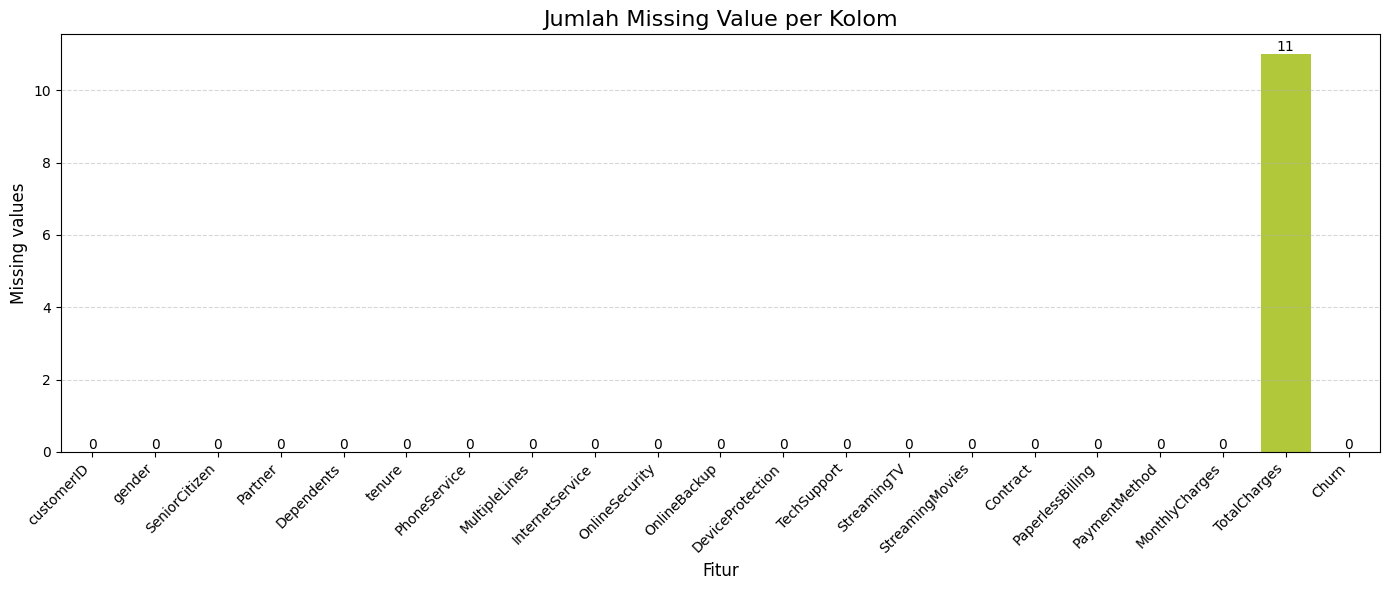

In [10]:
# Visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
# Plot data
ax = sns.barplot(x=missing_count.index, y=missing_count.values, palette='viridis')

plt.title('Jumlah Missing Value per Kolom', fontsize=16)
plt.ylabel('Missing values', fontsize=12)
plt.xlabel('Fitur', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label agar terbaca
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menambahkan label angka di atas batang
for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

## Visualisasi target

Churn
No     5174
Yes    1869
Name: count, dtype: int64


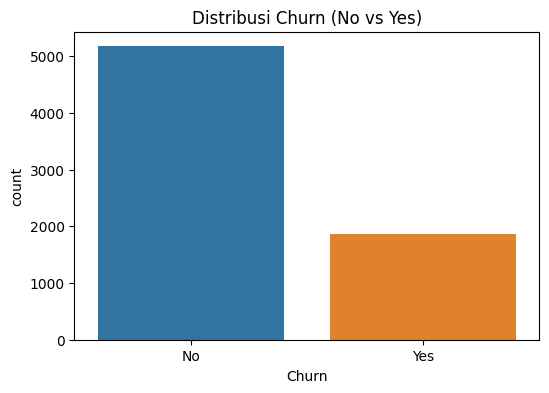

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

In [11]:
# Distribusi target
print(df['Churn'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Churn (No vs Yes)')
plt.show()

# Persentase
display(df['Churn'].value_counts(normalize=True).mul(100).round(2))


## Korelasi

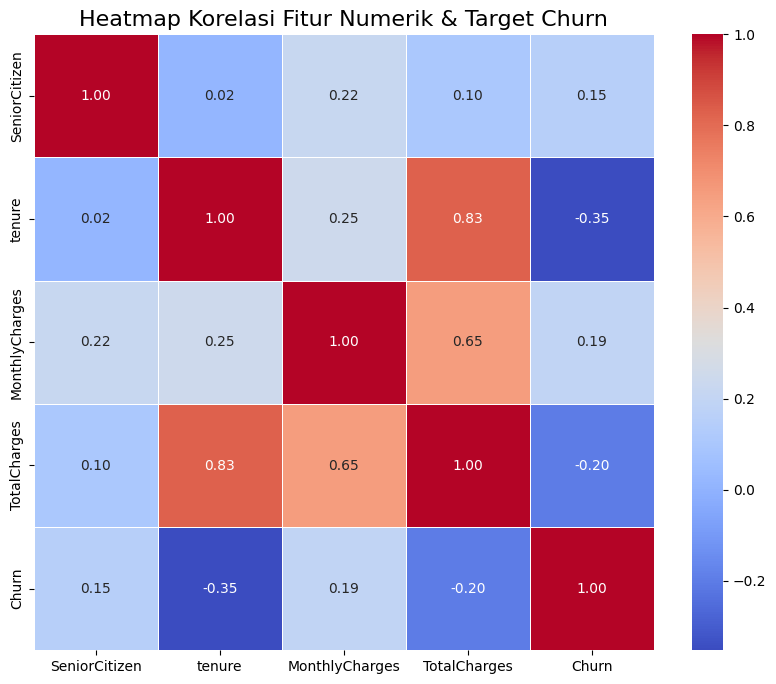

In [12]:
# Analisis korelasi
df_corr = df.copy()

# Encode target Churn menjadi angka (1 = Yes, 0 = No)
from sklearn.preprocessing import LabelEncoder
df_corr['Churn'] = LabelEncoder().fit_transform(df_corr['Churn'])

# Ambil hanya kolom numerik 
numeric_cols = df_corr.select_dtypes(include=['number'])

# Hitung matriks korelasi
corr_matrix = numeric_cols.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik & Target Churn', fontsize=16)
plt.show()

## Outliers

Fitur yang dicek outlier-nya: ['tenure', 'MonthlyCharges', 'TotalCharges']


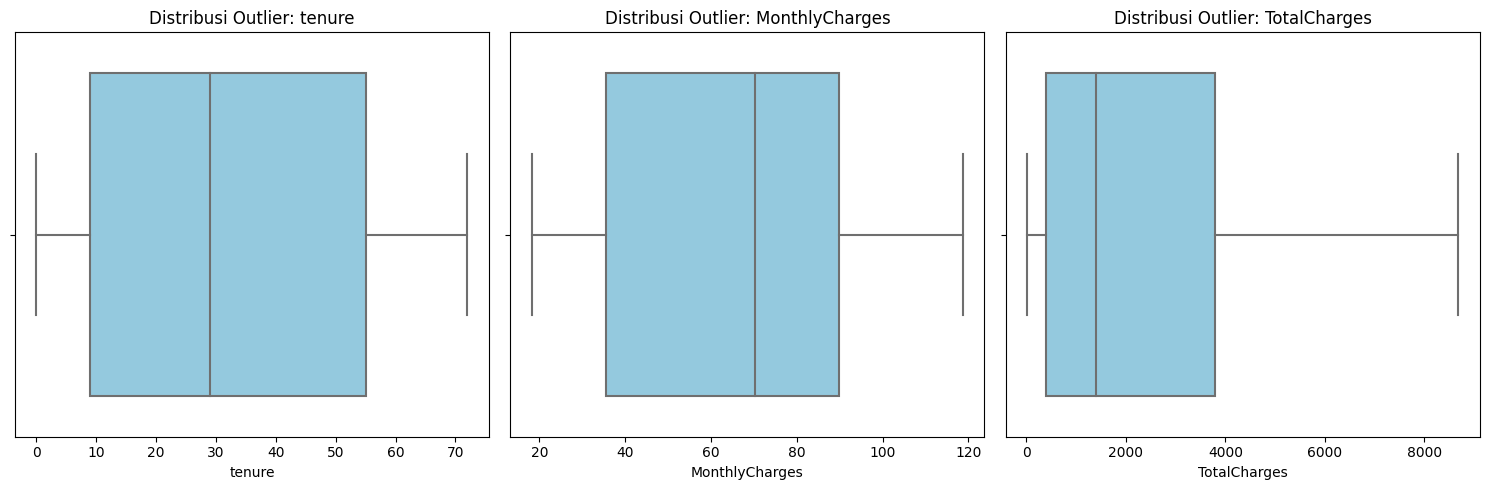

In [13]:
# Pastikan TotalCharges sudah angka (karena di data asli sering dianggap teks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# semua kolom numerik, kecualikan 'SeniorCitizen' (karena itu kategori 0/1)
all_numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_to_plot = [col for col in all_numeric_cols if col not in ['SeniorCitizen', 'Churn', 'customerID']]

print(f"Fitur yang dicek outlier-nya: {features_to_plot}")

#Visualisasi Boxplot untuk semua fitur tersebut
plt.figure(figsize=(15, 5))
for i, col in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i+1)
    sns.boxplot(x=df[col], color='skyblue') 
    plt.title(f'Distribusi Outlier: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [14]:
# Cek baris yang TotalCharges-nya NaN
rows_with_nan = df[df['TotalCharges'].isnull()]

print(f"Jumlah baris NaN: {len(rows_with_nan)}")
print("\nMenampilkan data tersebut (perhatikan kolom 'tenure'):")
display(rows_with_nan[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

Jumlah baris NaN: 11

Menampilkan data tersebut (perhatikan kolom 'tenure'):


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


## Handle Missing values

In [15]:
# handling missing values pd totalcharges menggunakan nilai median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(f"Missing values di TotalCharges telah diisi dengan median: {median_total_charges}")

Missing values di TotalCharges telah diisi dengan median: 1397.475


In [16]:
# Verifikasi ulang
print(f"Sisa Missing Value di TotalCharges: {df['TotalCharges'].isnull().sum()}")

Sisa Missing Value di TotalCharges: 0


In [17]:
# Persentase Missing Value
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Buat DataFrame
missing_df = pd.DataFrame({
    'Jumlah Hilang': missing_count,
    'Persentase (%)': missing_percent
})

print("\n=== Tabel Missing Value (Semua Kolom) ===")
print(missing_df)


=== Tabel Missing Value (Semua Kolom) ===
                  Jumlah Hilang  Persentase (%)
customerID                    0             0.0
gender                        0             0.0
SeniorCitizen                 0             0.0
Partner                       0             0.0
Dependents                    0             0.0
tenure                        0             0.0
PhoneService                  0             0.0
MultipleLines                 0             0.0
InternetService               0             0.0
OnlineSecurity                0             0.0
OnlineBackup                  0             0.0
DeviceProtection              0             0.0
TechSupport                   0             0.0
StreamingTV                   0             0.0
StreamingMovies               0             0.0
Contract                      0             0.0
PaperlessBilling              0             0.0
PaymentMethod                 0             0.0
MonthlyCharges                0             0

# Direct Modeling

## Data preparation

In [18]:
df_direct = df.copy()

# Drop customerID (karena tidak relevan untuk prediksi)
if 'customerID' in df_direct.columns:
    df_direct.drop('customerID', axis=1, inplace=True)

# Minimal Encoding
le = LabelEncoder()
for col in df_direct.columns:
    if df_direct[col].dtype == 'object':
        df_direct[col] = le.fit_transform(df_direct[col])

# Tetapkan X (Fitur) dan y (Target)
X_direct = df_direct.drop('Churn', axis=1)
y_direct = df_direct['Churn']

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X_direct, y_direct, test_size=0.2, random_state=42)
print("Preparation ready")

Preparation ready


## Define model

In [19]:
# Konvensional: Logistic Regression
model_lr = LogisticRegression(max_iter=3000, random_state=42)

# Ensemble Bagging: Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Ensemble Voting: Gabungan LR + KNN + SVM
clf1 = LogisticRegression(max_iter=3000, random_state=42)
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True, random_state=42)

model_voting = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3)],
    voting='hard'
)

models_direct = {
    "Logistic Regression": model_lr,
    "Random Forest": model_rf,
    "Voting Classifier": model_voting
}
print("Define model ready")

Define model ready


## Train & Evaluate

=== HASIL DIRECT MODELING ===

Model: Logistic Regression
  Accuracy : 0.8169
  Precision: 0.6803
  Recall   : 0.5818
  F1-Score : 0.6272


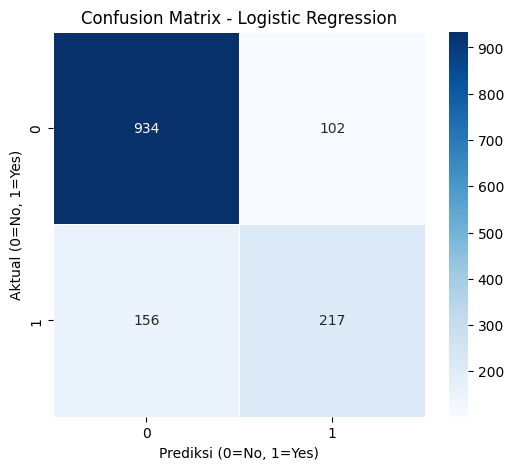


Model: Random Forest
  Accuracy : 0.7956
  Precision: 0.6592
  Recall   : 0.4718
  F1-Score : 0.5500


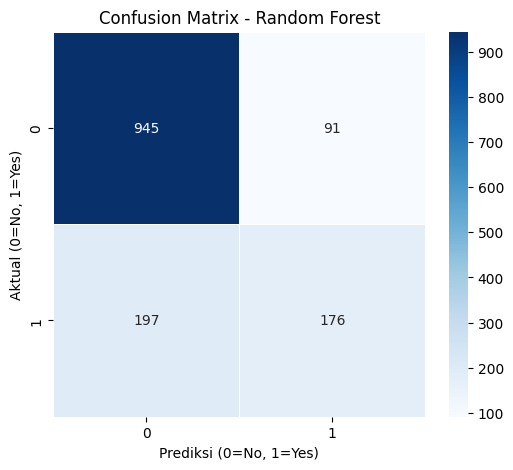


Model: Voting Classifier
  Accuracy : 0.7999
  Precision: 0.7459
  Recall   : 0.3700
  F1-Score : 0.4946


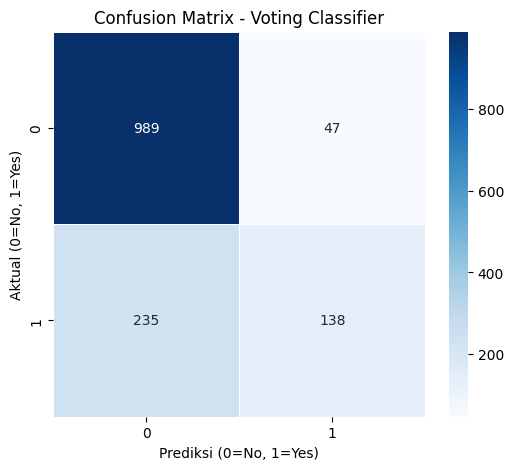

In [20]:
print("=== HASIL DIRECT MODELING ===")

for name, model in models_direct.items():
    # Training tanpa preprocessing lanjut
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi Metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    
    # Kosmetik Grafik
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi (0=No, 1=Yes)')
    plt.ylabel('Aktual (0=No, 1=Yes)')
    plt.show()

# Modeling with Preprocessing

## Data preparation

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Copy data agar aman
df_model = df.copy()

# pastikan TotalCharges adalah Angka
# Jika ada spasi kosong, akan jadi NaN (Not a Number)
df_model['TotalCharges'] = pd.to_numeric(df_model['TotalCharges'], errors='coerce')

# Encoding Target (Churn) menjadi 0 dan 1
# Yes -> 1 (Churn), No -> 0 (Tidak Churn)
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

print("Data siap, TotalCharges sudah numerik.")

Data siap, TotalCharges sudah numerik.


## Split Data

In [22]:
# Train-Test Split

# Pisahkan Fitur dan Target
X = df_model.drop(['Churn', 'customerID'], axis=1) # Buang ID dan Target
y = df_model['Churn']

# Split Data (80% Training, 20% Testing)
# stratify=y memastikan proporsi Churn di data latih & uji seimbang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data Training: {X_train.shape[0]}, Data Testing: {X_test.shape[0]}")

Data Training: 5634, Data Testing: 1409


## Pipeline preprocessing

In [23]:
# pipeline setup

# Identifikasi kolom secara otomatis
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Pipeline untuk Data Numerik
num_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk Data Kategorikal
cat_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # ignore kalau ada kategori asing
])

# Gabungkan keduanya dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

print("pipeline preprocessing ready")

pipeline preprocessing ready


## Smote

Menerapkan SMOTE...


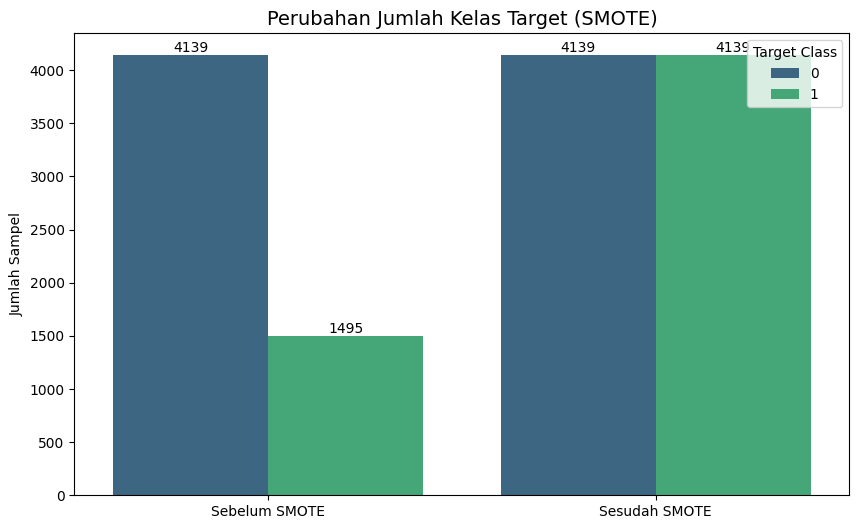

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE

# --- CELL TAMBAHAN: Visualisasi Target Sebelum & Sesudah SMOTE ---

def plot_target_balance(X, y, preprocessor):
    # 1. Perlu Preprocessing X dulu karena SMOTE butuh fitur angka untuk hitung tetangga
    X_trans = preprocessor.fit_transform(X)
    
    # 2. Lakukan SMOTE hanya untuk mendapatkan data hasil resample (simulasi)
    print("Menerapkan SMOTE...")
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_trans, y)
    
    # 3. Siapkan Data untuk Plotting
    # Data Sebelum
    df_before = pd.DataFrame({'Label': y})
    df_before['Kondisi'] = 'Sebelum SMOTE'
    
    # Data Sesudah
    df_after = pd.DataFrame({'Label': y_res})
    df_after['Kondisi'] = 'Sesudah SMOTE'
    
    # Gabung
    df_viz = pd.concat([df_before, df_after], axis=0)
    
    # 4. Buat Bar Chart
    plt.figure(figsize=(10, 6))
    
    # Gunakan countplot untuk menghitung otomatis
    ax = sns.countplot(data=df_viz, x='Kondisi', hue='Label', palette='viridis')
    
    plt.title('Perubahan Jumlah Kelas Target (SMOTE)', fontsize=14)
    plt.ylabel('Jumlah Sampel')
    plt.xlabel('')
    
    # Menambahkan angka di atas batang
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.legend(title='Target Class')
    plt.show()

# --- EKSEKUSI ---
plot_target_balance(X_train, y_train, preprocessor)

## Define model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# MODEL INDIVIDU (PAKAI SMOTE)

model_lr = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=500))
])

model_rf = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

model_svm = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(probability=True, random_state=42))
])

model_knn = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

model_ann = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=(64,32), 
                            max_iter=300, 
                            random_state=42))
])

model_gb = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

#  VOTING CLASSIFIER (6 MODEL)

voting_clf = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=500)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svm', SVC(probability=True, random_state=42)),
            ('knn', KNeighborsClassifier()),
            ('ann', MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300, random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
        ],
        voting='soft'
    ))
])

models = {
    "Logistic Regression + SMOTE": model_lr,
    "Random Forest + SMOTE": model_rf,
    "SVM + SMOTE": model_svm,
    "KNN + SMOTE": model_knn,
    "ANN + SMOTE": model_ann,
    "Gradient Boosting + SMOTE": model_gb,
    "Voting Classifier (6 Models + SMOTE)": voting_clf
}


## Evaluate Model

Logistic Regression + SMOTE
Accuracy : 0.7374024130589071
Precision: 0.5033898305084745
Recall   : 0.7941176470588235
F1-Score : 0.6161825726141079

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



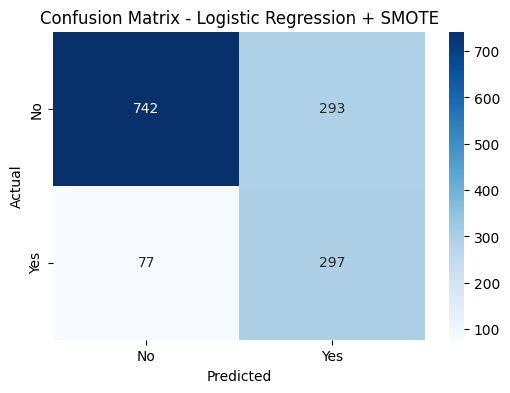




Random Forest + SMOTE
Accuracy : 0.7679205110007097
Precision: 0.5647382920110193
Recall   : 0.5481283422459893
F1-Score : 0.5563093622795116

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.56      0.55      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



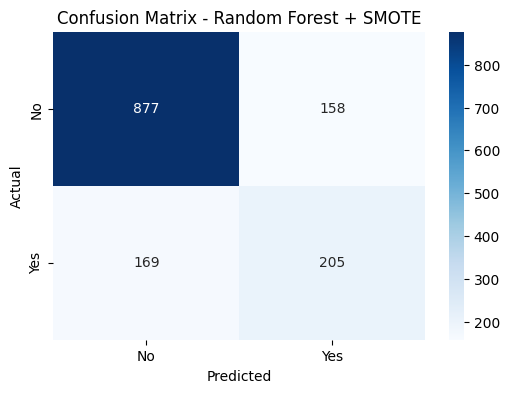




SVM + SMOTE
Accuracy : 0.7544357700496807
Precision: 0.52734375
Recall   : 0.7219251336898396
F1-Score : 0.6094808126410836

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.75      0.76      1409



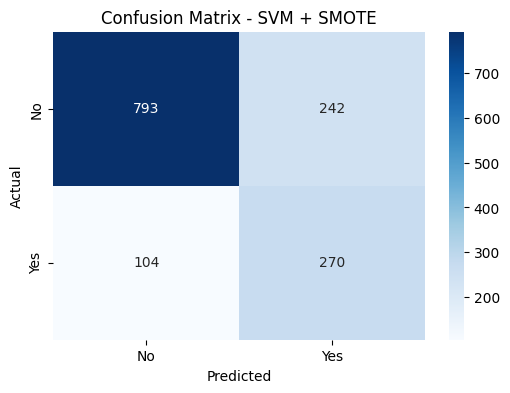




KNN + SMOTE
Accuracy : 0.6933995741660752
Precision: 0.45017182130584193
Recall   : 0.7005347593582888
F1-Score : 0.5481171548117155

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1035
           1       0.45      0.70      0.55       374

    accuracy                           0.69      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.75      0.69      0.71      1409



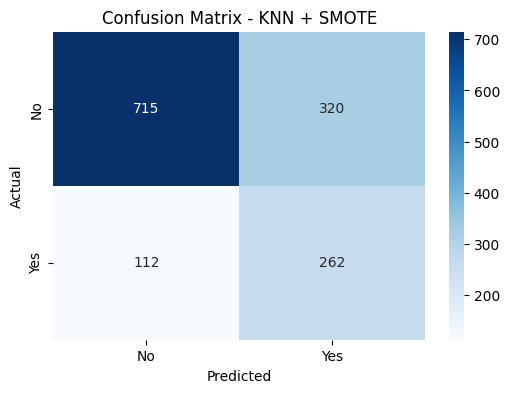




ANN + SMOTE
Accuracy : 0.7466288147622427
Precision: 0.5197215777262181
Recall   : 0.5989304812834224
F1-Score : 0.5565217391304348

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1035
           1       0.52      0.60      0.56       374

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



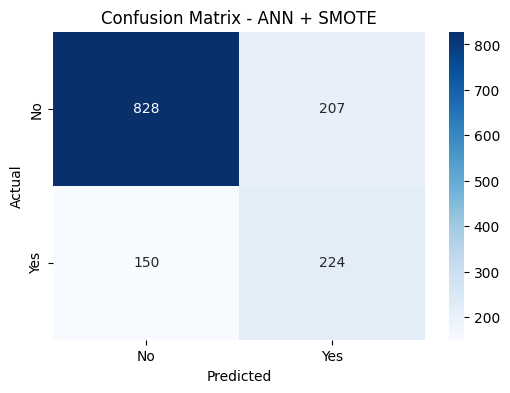




Gradient Boosting + SMOTE
Accuracy : 0.772888573456352
Precision: 0.5602678571428571
Recall   : 0.6711229946524064
F1-Score : 0.610705596107056

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



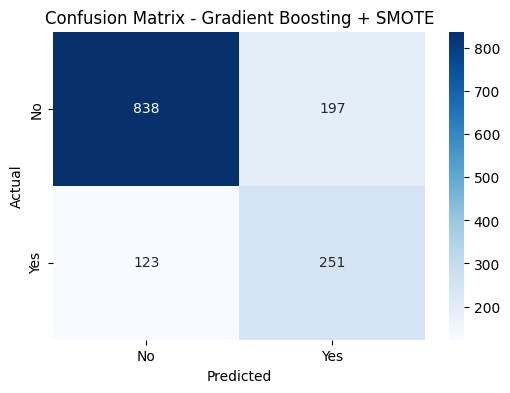




Voting Classifier (6 Models + SMOTE)
Accuracy : 0.7551454932576295
Precision: 0.5310492505353319
Recall   : 0.6631016042780749
F1-Score : 0.5897740784780023

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409



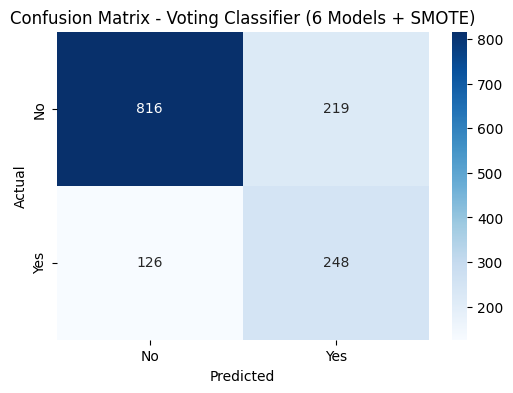

In [26]:
# Model evaluasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

for name, m in models.items():
    print("="*80)
    print(name)
    print("="*80)

    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n\n")


# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)

results_tuning = {}

def eval_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("="*80)
    print(name)
    print("="*80)

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results_tuning[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }


## LR (TUNED)

Logistic Regression Tuning
Accuracy : 0.7366926898509581
Precision: 0.5025380710659898
Recall   : 0.7941176470588235
F1-Score : 0.6155440414507772

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



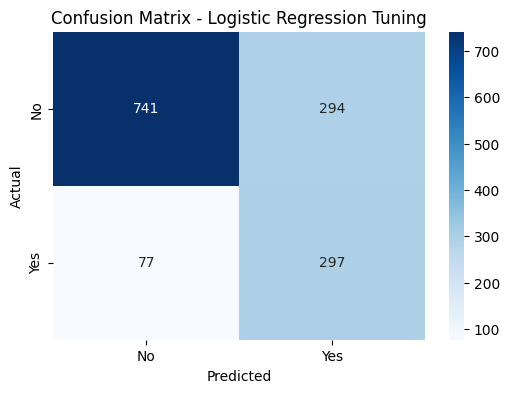

In [28]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

param_lr = {
    'model__C': [0.1, 1, 5],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(pipe_lr, param_lr, scoring="f1", cv=3, n_jobs=-1)
eval_model("Logistic Regression Tuning", grid_lr)


## RF (TUNED)

Random Forest Tuning
Accuracy : 0.7686302342086586
Precision: 0.5483870967741935
Recall   : 0.7272727272727273
F1-Score : 0.6252873563218391

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



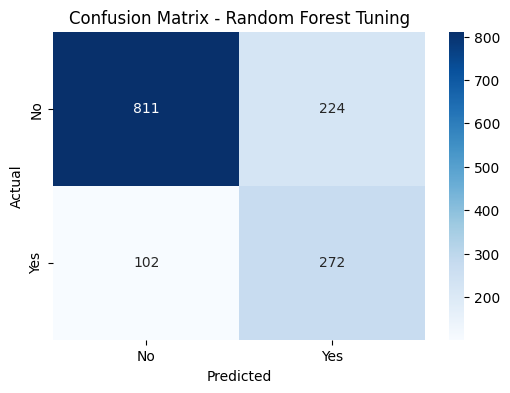

In [29]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

param_rf = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [8, 12, None],
    'model__min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(pipe_rf, param_rf, scoring="f1", cv=3, n_jobs=-1)
eval_model("Random Forest Tuning", grid_rf)


## SVM (TUNED)

SVM Tuning
Accuracy : 0.751596877217885
Precision: 0.5212014134275619
Recall   : 0.7887700534759359
F1-Score : 0.6276595744680851

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



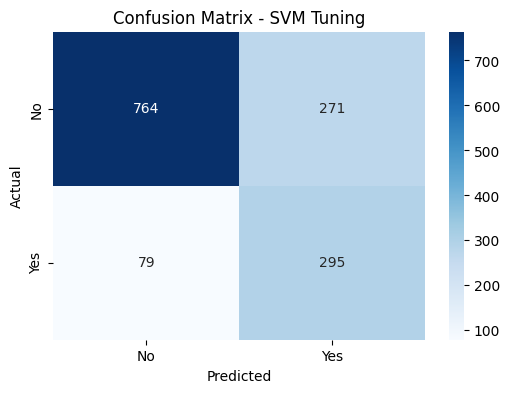

In [30]:
from sklearn.svm import SVC

pipe_svm = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(probability=True, random_state=42))
])

param_svm = {
    'model__C': [0.5, 1, 5],
    'model__kernel': ['rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_svm, scoring="f1", cv=3, n_jobs=-1)
eval_model("SVM Tuning", grid_svm)


## KNN (TUNED)

KNN Tuning
Accuracy : 0.7239176721078779
Precision: 0.4873096446700508
Recall   : 0.7700534759358288
F1-Score : 0.5968911917098445

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



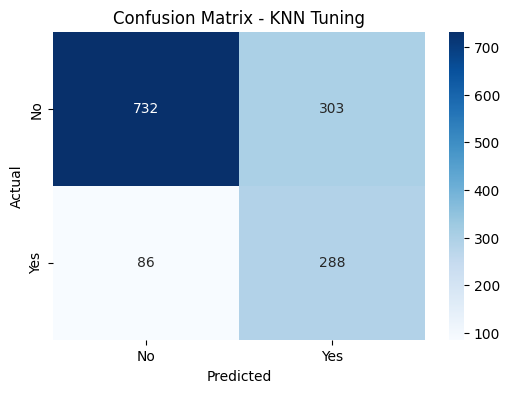

In [31]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

param_knn = {
    'model__n_neighbors': [5, 9, 15],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

grid_knn = GridSearchCV(pipe_knn, param_knn, scoring="f1", cv=3, n_jobs=-1)
eval_model("KNN Tuning", grid_knn)


## ANN/NLP (TUNED)

ANN Tuning
Accuracy : 0.723207948899929
Precision: 0.4790575916230366
Recall   : 0.4893048128342246
F1-Score : 0.48412698412698413

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.48      0.49      0.48       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



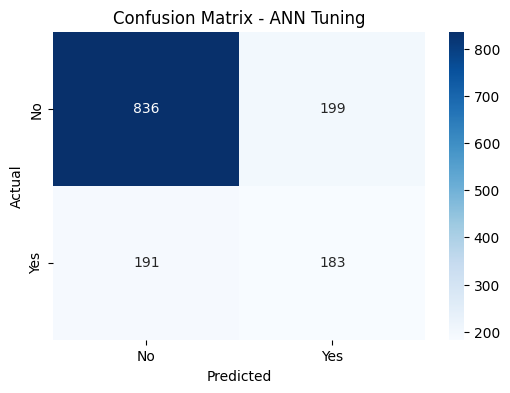

In [32]:
from sklearn.neural_network import MLPClassifier

pipe_ann = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', MLPClassifier(max_iter=400, random_state=42))
])

param_ann = {
    'model__hidden_layer_sizes': [(64,32),(128,64)],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate_init': [0.001, 0.01]
}

grid_ann = GridSearchCV(pipe_ann, param_ann, scoring="f1", cv=3, n_jobs=-1)
eval_model("ANN Tuning", grid_ann)


## G BOOST (TUNED)

Gradient Boosting Tuning
Accuracy : 0.765791341376863
Precision: 0.5426356589147286
Recall   : 0.7486631016042781
F1-Score : 0.6292134831460674

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



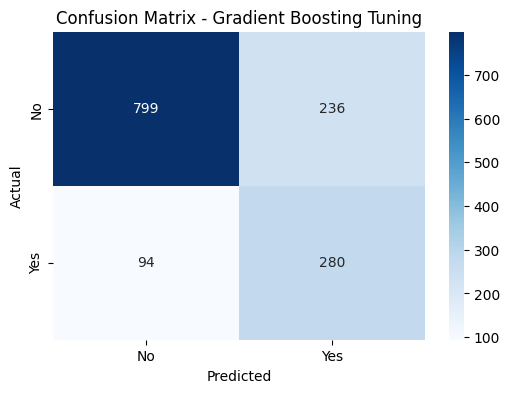

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_gb = {
    'model__n_estimators': [150, 250],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]
}

grid_gb = GridSearchCV(pipe_gb, param_gb, scoring="f1", cv=3, n_jobs=-1)
eval_model("Gradient Boosting Tuning", grid_gb)


## VOTING CLASSIFIER (TUNED)

Voting Classifier Tuning
Accuracy : 0.7665010645848119
Precision: 0.5463917525773195
Recall   : 0.7085561497326203
F1-Score : 0.6169965075669382

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



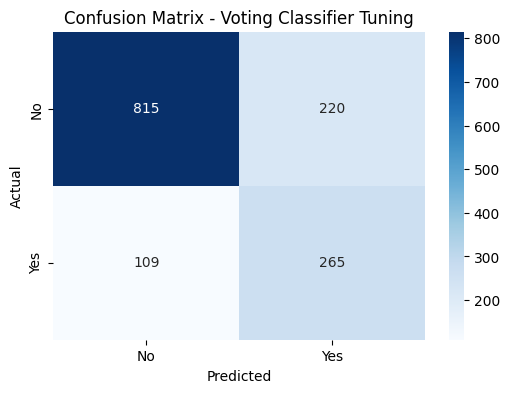

In [34]:
from sklearn.ensemble import VotingClassifier

pipe_vote = Pipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=500)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svm', SVC(probability=True, random_state=42)),
        ],
        voting='soft'
    ))
])

param_vote = {
    'model__weights': [(1,1,1),(1,2,2),(2,1,2),(2,2,1)]
}

grid_vote = GridSearchCV(pipe_vote, param_vote, scoring="f1", cv=3, n_jobs=-1)
eval_model("Voting Classifier Tuning", grid_vote)


In [35]:
pd.DataFrame(results_tuning).T.sort_values("f1", ascending=False)

,accuracy,precision,recall,f1
Gradient Boosting Tuning,0.765791,0.542636,0.748663,0.629213
SVM Tuning,0.751597,0.521201,0.788770,0.627660
Random Forest Tuning,0.768630,0.548387,0.727273,0.625287
Voting Classifier Tuning,0.766501,0.546392,0.708556,0.616997
Logistic Regression Tuning,0.736693,0.502538,0.794118,0.615544
KNN Tuning,0.723918,0.487310,0.770053,0.596891
ANN Tuning,0.723208,0.479058,0.489305,0.484127


## Threshold Moving

In [36]:
# PILIH MODEL TERBAIK DARI TUNING
best_model = grid_gb.best_estimator_

In [37]:
# PROB PREDICT 
y_prob = best_model.predict_proba(X_test)[:,1]

In [38]:
# THRESHOLD UJI
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.91, 0.05)
threshold_results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)

    threshold_results.append([
        t,
        accuracy_score(y_test, y_pred_t),
        precision_score(y_test, y_pred_t),
        recall_score(y_test, y_pred_t),
        f1_score(y_test, y_pred_t)
    ])

df_threshold = pd.DataFrame(
    threshold_results,
    columns=["threshold","accuracy","precision","recall","f1"]
)

df_threshold


,threshold,accuracy,precision,recall,f1
0,0.10,0.530163,0.359375,0.983957,0.526466
1,0.15,0.584102,0.386510,0.965241,0.551988
2,0.20,0.629524,0.412941,0.938503,0.573529
3,0.25,0.660043,0.432432,0.898396,0.583840
4,0.30,0.689141,0.454930,0.863636,0.595941
5,0.35,0.709723,0.473763,0.844920,0.607109
6,0.40,0.735273,0.500818,0.818182,0.621320
7,0.45,0.753016,0.523214,0.783422,0.627409
8,0.50,0.765791,0.542636,0.748663,0.629213
9,0.55,0.777147,0.564103,0.705882,0.627078


In [39]:
# AMBIL MODEL TERBAIK THRESHOLD 
best_row = df_threshold.loc[df_threshold['f1'].idxmax()]
best_row

threshold    0.500000
accuracy     0.765791
precision    0.542636
recall       0.748663
f1           0.629213
Name: 8, dtype: float64

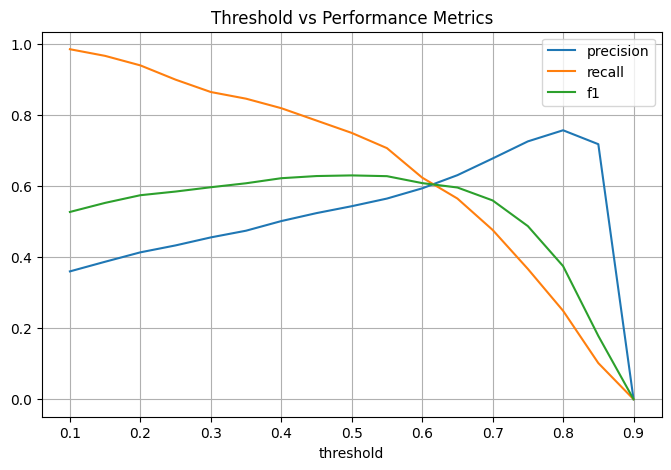

In [40]:
# VISUALISASI
import matplotlib.pyplot as plt

df_threshold.plot(x="threshold", y=["precision","recall","f1"], figsize=(8,5))
plt.title("Threshold vs Performance Metrics")
plt.grid()
plt.show()


# Deployment

## Simpan Model

In [41]:
best_model = grid_gb.best_estimator_

import joblib
joblib.dump(best_model, 'churn_prediction_model.pkl')

print("✅ Model berhasil disimpan!")

✅ Model berhasil disimpan!
